In [1]:
#importing imortant libraries
import numpy as np
import pandas as pd

In [2]:
#reading dataset of South Africa Medical Journal
chd_df = pd.read_csv("SA Heart.csv")

In [3]:
chd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ind        462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [4]:
# Columns other than chd are the features to predict chd
X_features = list(chd_df.columns)
X_features.remove('chd')

In [5]:
# Features are stored in X and response variable in Y
X = chd_df[X_features]
Y = chd_df.chd

In [6]:
# Encoding 'famhist' variable 
encoded_X = pd.get_dummies(X,
                           drop_first= True)

In [ ]:
#Encoded features have 'bool' type data type which needs to be converted as 'int64'data type.
encoded_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ind              462 non-null    int64  
 1   sbp              462 non-null    int64  
 2   tobacco          462 non-null    float64
 3   ldl              462 non-null    float64
 4   adiposity        462 non-null    float64
 5   typea            462 non-null    int64  
 6   obesity          462 non-null    float64
 7   alcohol          462 non-null    float64
 8   age              462 non-null    int64  
 9   famhist_Present  462 non-null    bool   
dtypes: bool(1), float64(5), int64(4)
memory usage: 33.1 KB


In [8]:
# Changing data type from 'bool to 'int64'
encoded_X.iloc[ : , 9 : ] = encoded_X.iloc[ : , 9 : ].astype('int64')

C:\Users\Pranav\AppData\Local\Temp\ipykernel_14760\2465002531.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      1
1      0
2      1
3      1
4      1
      ..
457    0
458    0
459    0
460    0
461    1
Name: famhist_Present, Length: 462, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  encoded_X.iloc[ : , 9 : ] = encoded_X.iloc[ : , 9 : ].astype('int64')


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#splitting dataset into training data and test data
X_train, X_test, y_train, y_test = train_test_split(
    encoded_X,
    Y,
    train_size=0.7,
    random_state=100
)

In [ ]:
import statsmodels.api as sm

#fitting the data into Logistic Regression Model
logit_model_1 = sm.Logit(y_train,
                         sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.489635
         Iterations 6


In [12]:
logit_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: chd              Pseudo R-squared: 0.232     
Date:               2025-01-03 16:27 AIC:              338.3039  
No. Observations:   323              BIC:              379.8581  
Df Model:           10               Log-Likelihood:   -158.15   
Df Residuals:       312              LL-Null:          -205.82   
Converged:          1.0000           LLR p-value:      4.6365e-16
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -6.1906   1.6325 -3.7921 0.0001 -9.3903 -2.9909
ind               -0.0017   0.0011 -1.5325 0.1254 -0.0040  0.0005
sbp                0.0054   0.0072  0.7513 0.4525 -0.0087  0.0196
tobacco            0.0611   0.0315  1.9391 0.0525 -0.0007  0.1229
ldl                0.1792   0.0693  2.5858 0.0097  0.0434  0.3150
adiposity          0.0218   0.0346  0.6299 0.5288 -0.0460  0.0896
typea              0.0355   0.0150  2.3754 0.0175  0.0062  0.0648
obesity           -0.0499   0.0506 -0.9866 0.3238 -0.1492  0.0493
alcohol            0.0014   0.0051  0.2795 0.7799 -0.0086  0.0114
age                0.0495   0.0150  3.3035 0.0010  0.0201  0.0788
famhist_Present    1.2819   0.2829  4.5307 0.0000  0.7274  1.8364
=================================================================

"""

In [13]:
# get_significant vars function will filter out significant features having p-value less than 0.05
def get_signficant_vars(lm) :
    var_p_vals_df= pd.DataFrame(lm.pvalues,
                              columns=['pvals'])
    var_p_vals_df['vars'] = var_p_vals_df.index
    
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05].vars)

In [14]:
significant_vars = get_signficant_vars(logit_model_1)
significant_vars.remove('const')
significant_vars

['ldl', 'typea', 'age', 'famhist_Present']

In [15]:
#fitting significant vars only in the model
logit_model_2 = sm.Logit(y_train,
                         sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.503055
         Iterations 6


In [16]:
logit_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: chd              Pseudo R-squared: 0.211     
Date:               2025-01-03 16:27 AIC:              334.9733  
No. Observations:   323              BIC:              353.8616  
Df Model:           4                Log-Likelihood:   -162.49   
Df Residuals:       318              LL-Null:          -205.82   
Converged:          1.0000           LLR p-value:      6.6905e-18
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -7.1331   1.1280 -6.3236 0.0000 -9.3440 -4.9223
ldl                0.1722   0.0616  2.7970 0.0052  0.0515  0.2929
typea              0.0407   0.0144  2.8169 0.0048  0.0124  0.0690
age                0.0635   0.0119  5.3538 0.0000  0.0403  0.0868
famhist_Present    1.1886   0.2723  4.3648 0.0000  0.6549  1.7223
=================================================================

"""

In [19]:
y_pred_df = pd.DataFrame()
y_pred_df['actual'] = y_test
y_pred_df['pred'] = logit_model_2.predict(sm.add_constant(X_test[significant_vars]))
y_pred_df

,actual,pred
302,0,0.211247
424,1,0.108237
236,0,0.408498
272,0,0.168293
360,1,0.792271
...,...,...
381,0,0.383046
178,0,0.175247
45,0,0.270510
150,0,0.361374


In [108]:
import seaborn as sns

In [104]:
#this function will find the optimal cutoff probability to predict the cvd using Youden's Index
def find_optimal_cutoff_probability (actual, pred) :
    idx = 0
    cut_off_df = pd.DataFrame(columns=['cut_off_prob', 'diff_tpr_fpr'])
    
    for cp in range(10, 51):
        cp_pred = pred.map(
            lambda x : 1 if (x > (cp / 100)) else 0
        )

        conf_matr = metrics.confusion_matrix(actual, cp_pred)

        tp = conf_matr[0][0]
        fp = conf_matr[1][0]
        fn = conf_matr[0][1]
        tn = conf_matr[1][1]

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)

        cut_off_df.loc[idx] = [cp / 100, tpr - fpr]

        idx+=1
        cp+=1

    cut_off_df = cut_off_df.sort_values('diff_tpr_fpr', ascending=False)

    return cut_off_df.iloc[0,0]


In [107]:
optimal_cutoff_probability = find_optimal_cutoff_probability(y_pred_df.actual, y_pred_df.pred)
optimal_cutoff_probability


0.39

In [109]:
y_pred_df['optimal_pred'] = y_pred_df.pred.map(
        lambda x : 1 if x > optimal_cutoff_probability else 0
)

In [137]:
import matplotlib.pyplot as plt

def get_cm(actual, optimal_pred):

    conf_matr_cutoff_prob = metrics.confusion_matrix(actual,
                                                    optimal_pred,
                                                    labels=[1, 0])

    plt.figure(figsize= (6, 4))
    sns.heatmap(conf_matr_cutoff_prob, annot= True, fmt='.2f',
                xticklabels= ['chd_positive', 'chd_negative'],
                yticklabels= ['chd_positive', 'chd_negative'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

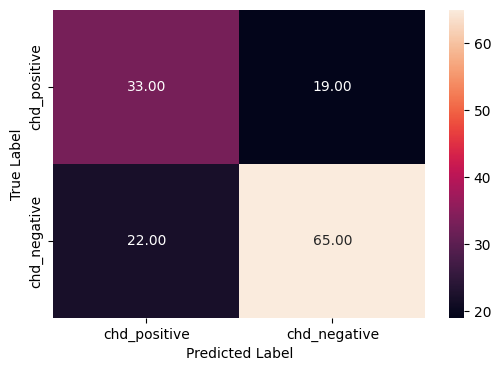

In [138]:
get_cm(y_pred_df.actual, y_pred_df.optimal_pred)

In [145]:
classification_report_1 = metrics.classification_report(y_pred_df.actual,
                                                      y_pred_df.optimal_pred)
print(classification_report_1)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        87
           1       0.60      0.63      0.62        52

    accuracy                           0.71       139
   macro avg       0.69      0.69      0.69       139
weighted avg       0.71      0.71      0.71       139



In [135]:
#this function will find the optimal cutoff probability to predict the cvd using cost based approach

def get_optimal_cost_cutoff(actual, pred, cost_FN, cost_FP):
    def get_total_cost(actual, pred, cost_FN, cost_FP) :
        cm = metrics.confusion_matrix(actual, pred, labels=[1, 0])

        return cost_FP * cm[1][0] + cost_FN * cm[0][1]
    idx = 0
    cost_df = pd.DataFrame(columns=['cut_off_prob', 'cost'])

    for cp in range(10, 51):
        cost_df.loc[idx] = [(cp / 100), get_total_cost(actual, pred.map(
            lambda x : 1 if x > (cp / 100) else 0
        ), cost_FN, cost_FP)]

        idx+=1
        cp+=1
    

    cost_df = cost_df.sort_values('cost')

    return cost_df.iloc[0,0]

In [139]:
optimal_cost_cutoff_probability = get_optimal_cost_cutoff(y_pred_df.actual, y_pred_df.pred, 5, 1)
optimal_cost_cutoff_probability

0.1

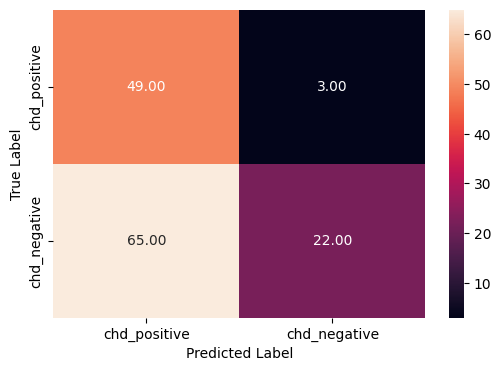

In [140]:
y_pred_df['optimal_cost_pred'] = y_pred_df.pred.map(
    lambda x : 1 if x > optimal_cost_cutoff_probability else 0
)

get_cm(y_pred_df.actual, y_pred_df.optimal_cost_pred)

In [146]:
classification_report_2 = metrics.classification_report(y_pred_df.actual,
                                                      y_pred_df.optimal_cost_pred)
print(classification_report_2)

              precision    recall  f1-score   support

           0       0.88      0.25      0.39        87
           1       0.43      0.94      0.59        52

    accuracy                           0.51       139
   macro avg       0.65      0.60      0.49       139
weighted avg       0.71      0.51      0.47       139



In [149]:
# building a decision tree classifier model to predict the probability of chd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [171]:
# finding Optimal Criteria and Max Depth

parameters = [{'criterion' : ['gini', 'emtropy'],
               'max_depth' : range(2, 10)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,
                   parameters,
                   cv=10,
                   scoring='roc_auc')

clf.fit(X_train[significant_vars], y_train)

c:\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python\Python312\Lib\site-packages\sklearn\utils\_param_val

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'emtropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [158]:
clf.best_score_

0.6975580480125936

In [159]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [169]:
clf_tree= DecisionTreeClassifier(
    criterion='gini',
    max_depth=5
)
clf_tree.fit(X_train[significant_vars], y_train)
y_pred_df['tree_predict'] = clf_tree.predict(X_test[significant_vars])

In [170]:
#comparing decision tree classifier and logistic regression model performance

roc_auc_score_clf_tree = metrics.roc_auc_score(y_pred_df.actual, y_pred_df.tree_predict)
roc_auc_score_youden_index = metrics.roc_auc_score(y_pred_df.actual, y_pred_df.optimal_pred)
roc_auc_score_cost = metrics.roc_auc_score(y_pred_df.actual, y_pred_df.optimal_cost_pred)
roc_auc_score_youden_index, roc_auc_score_cost, roc_auc_score_clf_tree

(0.6908709106984969, 0.5975906277630416, 0.6427939876215738)

Hence logistic regression model using Youden's index gives the best performance out of these three models.